In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # para vosualización de intervalos
import seaborn as sns

In [2]:
#pwd # para saber en q directorio estamos
#cd .. # retrocedo un folder
#cd Documents # ingreso a Documents
#ls # muestro el contenido del folder

### 1. Obtención de datos

In [3]:
casas = pd.read_csv("USA_Housing.csv") #creo el DataFrame

In [4]:
casas.head(3) # muestro los 5ros elementos por defecto 

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [5]:
casas.info()
#casas['Price'] # devuelve una columna 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
casas.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


C:\Users\ANALISIS DE DATOS\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

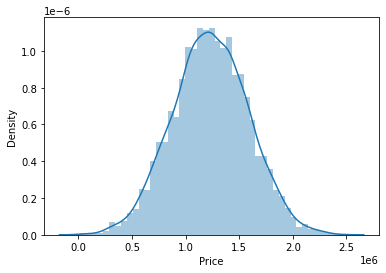

In [7]:
#Distribución del precio
#sns.displot(casas['Price']) #cuadraditos
"""con casas.describe()  vimos que el precio medio es 1.232073, el maximo 2,5 y el minimo en 1,6
la curva correcponde a distribucion normal--> La distribución tiene la forma de una campana
y la mayor parte del área de esta campana se encuentra donde la media (mediana y moda).
El área debajo de la campana es de 1, y se divide por 0.5 a la izquierda y 0.5 a la derecha de la media."""

sns.distplot(casas['Price'])

### 2. Limpieza de datos


<AxesSubplot:>

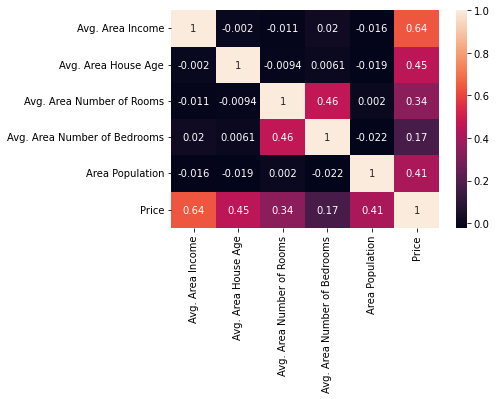

In [8]:
""" Veo la correlacion entre las columnas lo que mas influye en el precio es 0,64
se toma en cuenta el minimo, maximo """
sns.heatmap(casas.corr(), annot=True)

In [9]:
# Dimensiones del dataset
casas.shape

(5000, 7)

In [10]:
# Número de datos ausentes por variable
"""Los valores ausentes son muy importantes a la hora de crear modelos, 
la mayoría de algoritmos no aceptan observaciones incompletas o bien se 
ven muy influenciados por ellas. Aunque la imputación de valores ausentes 
es parte del preprocesado y, por lo tanto, debe de aprenderse únicamente 
con los datos de entrenamiento, su identificación se tiene que realizar 
antes de separar los datos para asegurar que se establecen todas las 
estrategias de imputación necesarias."""
casas.isna().sum().sort_values()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

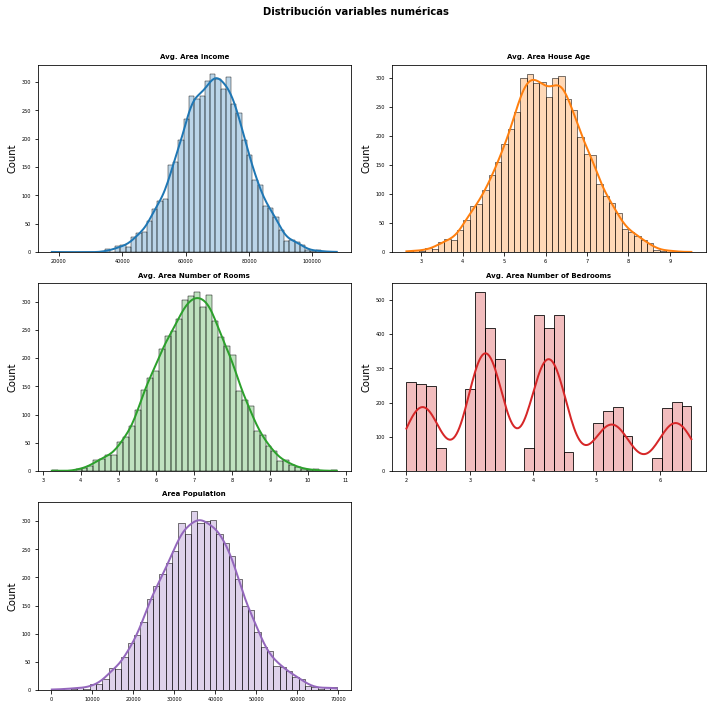

In [11]:
# Gráfico de distribución para cada variable numérica
# para conocer las características definitivas
"""Explicar que se excluye la etiqueta """

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axes = axes.flat
columnas_numeric = casas.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Price')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = casas,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 5)
    axes[i].set_xlabel("")
    
# Se eliminan los axes vacíos
for i in [5]:
    fig.delaxes(axes[i])    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [12]:
# como parte de la limpieza de datos es modificarlos de modo q se pueda acceder a ellos
casas.columns 

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [15]:
# Valores observados de Bedrooms
#casas.Avg. Area Number of Bedrooms.value_counts() 
"""no es posible necesito renombrar"""

'no es posible necesito renombrar'

In [13]:
casas=casas.rename(columns={'Avg. Area Income':'Income', 'Avg. Area House Age':'HouseAge', 'Avg. Area Number of Rooms':'Rooms',
       'Avg. Area Number of Bedrooms':'Bedrooms', 'Area Population':'Population'})

In [14]:
# Se convierte la variable Bedrooms tipo string
casas.Bedrooms = casas.Bedrooms.astype("str")
"""luego realizar un modelo que incluya este dato"""

'luego realizar un modelo que incluya este dato'

In [16]:
casas.select_dtypes(include=['float64', 'int']).describe()

,Income,HouseAge,Rooms,Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,69621.713378,2.469066e+06


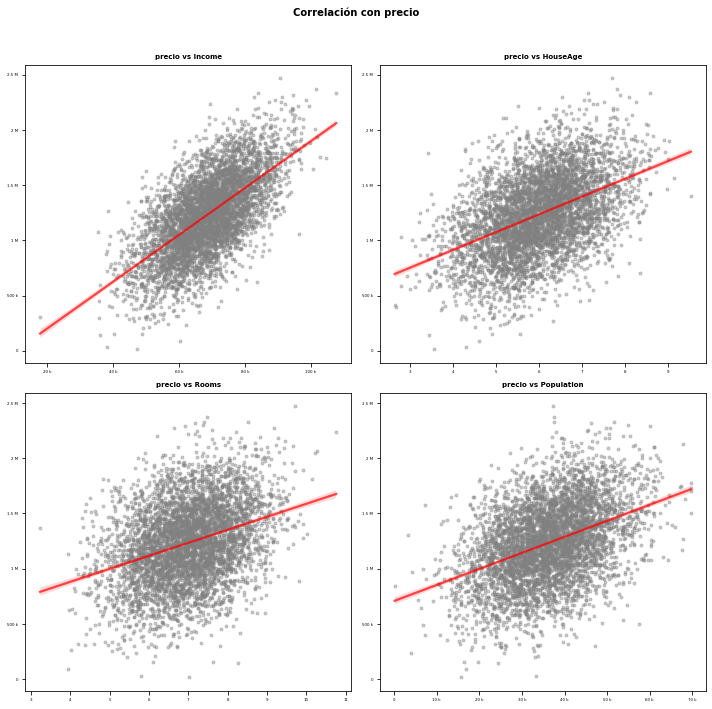

In [17]:
"""Como el objetivo del estudio es predecir el precio de las viviendas, 
el análisis de cada variable se hace también en relación a la variable respuesta precio.
Analizando los datos de esta forma, se pueden empezar a extraer ideas sobre qué
variables están más relacionadas con el precio y de qué forma."""

# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.flat
columnas_numeric = casas.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Price')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = casas[colum],
        y           = casas['Price'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 4)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold");


In [18]:
# Variables cualitativas (tipo object)
casas.select_dtypes(include=['object']).describe()

,Bedrooms,Address
count,5000,5000
unique,255,5000
top,4.38,USCGC Jones\nFPO AP 12026
freq,46,1


In [19]:
casas.head(3)

,Income,HouseAge,Rooms,Bedrooms,Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [20]:
cols = [col for col in casas if col != casas.columns[-4]] + [casas.columns[-4]] 
casas = casas[cols]
casas.head(3)

,Income,HouseAge,Rooms,Population,Price,Address,Bedrooms
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",4.09
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",3.09
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",5.13


In [21]:
# Acomodar la data tambien es una opcion

# Cambiar el orden de las columnas
cols = [col for col in casas if col != casas.columns[-2]] + [casas.columns[-2]] 
casas = casas[cols]
casas.head()

,Income,HouseAge,Rooms,Population,Price,Bedrooms,Address
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06,4.09,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06,3.09,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06,5.13,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06,3.26,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05,4.23,USNS Raymond\nFPO AE 09386
